In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import math

# Задание 1

# Вопросы
1. Что делает следующий код?<br></br>
<code>import warnings
warnings.filterwarnings("ignore")</code>
2. Почему в следующем коде квантили посчитались именно так?

In [2]:
s = pd.Series([1, 2, 3, 3, 3, 4, 5])

In [3]:
s.describe()

count    7.000000
mean     3.000000
std      1.290994
min      1.000000
25%      2.500000
50%      3.000000
75%      3.500000
max      5.000000
dtype: float64

## 1.1
Изучите примеры точечной работы с признаками в исходных данных из файла LR4Pr_1(Features).

## 1.2

Поработав в документацией и примерами проведите отбор и подготовку признаков из файла telecom.csv.

In [193]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('telecom.csv')

In [6]:
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [7]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
data['churn']=data['churn'].astype('int64')

In [10]:
data['churn'][10]

1

In [11]:
data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls        churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [12]:
n = 3333
sum = 0
for i in range(n):
    sum += data['account length'][i]
mean = sum / n # среднее
print(mean)

101.06480648064806


In [13]:
sum = 0
for i in range(n):
    sum += (data['account length'][i] - mean) ** 2
std = math.sqrt(sum / n) # стандартное отклонение, мера рассеивания
print(std)

39.81613156715945


In [14]:
temp = data['account length']

In [15]:
sorted(temp)[round(n / 2)]

101

In [16]:
sorted(temp)[round(n / 4)]

74

In [17]:
sorted(temp)[round(n / 4 * 3)]

127

In [18]:
data.describe(include=['object', 'bool'])

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     382-4657                 no              no
freq     106            1               3010            2411

In [19]:
data['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [20]:
data['churn'].value_counts(normalize = True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [23]:
data[data['churn'] == 1].describe()

account length   area code  number vmail messages  total day minutes  \
count      483.000000  483.000000             483.000000         483.000000   
mean       102.664596  437.817805               5.115942         206.914079   
std         39.467820   42.792270              11.860138          68.997792   
min          1.000000  408.000000               0.000000           0.000000   
25%         76.000000  408.000000               0.000000         153.250000   
50%        103.000000  415.000000               0.000000         217.600000   
75%        127.000000  510.000000               0.000000         265.950000   
max        225.000000  510.000000              48.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count       483.000000        483.000000         483.000000       483.000000   
mean        101.335404         35.175921         212.410145       100.561077   
std          21.582307         11.729710          51.728910        19.724711   
min           0.000000          0.000000          70.900000        48.000000   
25%          87.500000         26.055000         177.100000        87.000000   
50%         103.000000         36.990000         211.300000       101.000000   
75%         116.500000         45.210000         249.450000       114.000000   
max         165.000000         59.640000         363.700000       168.000000   

       total eve charge  total night minutes  total night calls  \
count        483.000000           483.000000         483.000000   
mean          18.054969           205.231677         100.399586   
std            4.396762            47.132825          19.950659   
min            6.030000            47.400000          49.000000   
25%           15.055000           171.250000          85.000000   
50%           17.960000           204.800000         100.000000   
75%           21.205000           239.850000         115.000000   
max           30.910000           354.900000         158.000000   

       total night charge  total intl minutes  total intl calls  \
count          483.000000           483.00000        483.000000   
mean             9.235528            10.70000          4.163561   
std              2.121081             2.79319          2.551575   
min              2.130000             2.00000          1.000000   
25%              7.705000             8.80000          2.000000   
50%              9.220000            10.60000          4.000000   
75%             10.795000            12.80000          5.000000   
max             15.970000            20.00000         20.000000   

       total intl charge  customer service calls  churn  
count         483.000000              483.000000  483.0  
mean            2.889545                2.229814    1.0  
std             0.754152                1.853275    0.0  
min             0.540000                0.000000    1.0  
25%             2.380000                1.000000    1.0  
50%             2.860000                2.000000    1.0  
75%             3.460000                4.000000    1.0  
max             5.400000                9.000000    1.0

In [26]:
data[['customer service calls', 'total day minutes']].apply(lambda x: (x - np.mean(x)) / np.std(x)) 

customer service calls  total day minutes
0                  -0.427932           1.566767
1                  -0.427932          -0.333738
2                  -1.188218           1.168304
3                   0.332354           2.196596
4                   1.092641          -0.240090
...                      ...                ...
3328                0.332354          -0.432895
3329                1.092641           0.942447
3330                0.332354           0.018820
3331                0.332354           0.624778
3332               -1.188218           1.003042

[3333 rows x 2 columns]

In [27]:
pd.crosstab(data['churn'], data['customer service calls'],margins=True)

customer service calls    0     1    2    3    4   5   6  7  8  9   All
churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

In [28]:
pd.crosstab(data['churn'], data['voice mail plan'], normalize=True)

voice mail plan        no       yes
churn                              
0                0.602460  0.252625
1                0.120912  0.024002

In [29]:
pd.crosstab(data['churn'], data['international plan'],margins=True)

international plan    no  yes   All
churn                              
0                   2664  186  2850
1                    346  137   483
All                 3010  323  3333

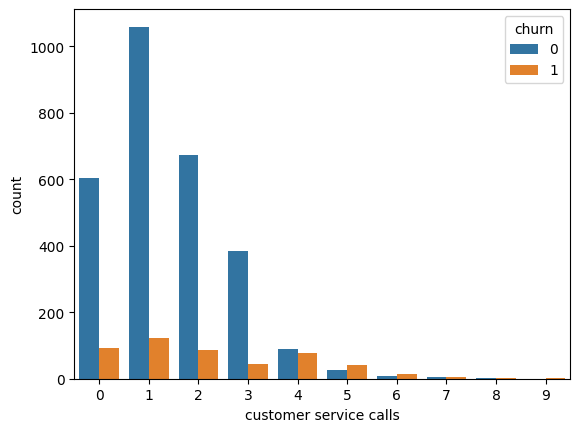

In [30]:
sns.countplot(x='customer service calls', hue='churn', data=data);

In [32]:
data['intensive_service_calls_Q'] = (data['customer service calls'] > 3).astype('int')
pd.crosstab(data['intensive_service_calls_Q'], data['churn'], margins=True)

churn                         0    1   All
intensive_service_calls_Q                 
0                          2721  345  3066
1                           129  138   267
All                        2850  483  3333

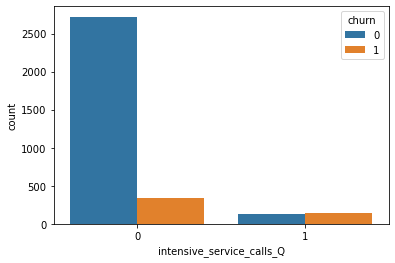

In [27]:
sns.countplot(x='intensive_service_calls_Q', hue='churn', data=data);

In [33]:
d = {'no' : 0, 'yes' : 1}
data['international plan'] = data['international plan'].map(d)

In [34]:
data['voice mail plan'] = data['voice mail plan'].map(d)

In [35]:
data.head()

state  account length  area code phone number  international plan  \
0    KS             128        415     382-4657                   0   
1    OH             107        415     371-7191                   0   
2    NJ             137        415     358-1921                   0   
3    OH              84        408     375-9999                   1   
4    OK              75        415     330-6626                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total day charge  ...  total eve charge  total night minutes  \
0             45.07  ...             16.78                244.7   
1             27.47  ...             16.62                254.4   
2             41.38  ...             10.30                162.6   
3             50.90  ...              5.26                196.9   
4             28.34  ...             12.61                186.9   

   total night calls  total night charge  total intl minutes  \
0                 91               11.01                10.0   
1                103               11.45                13.7   
2                104                7.32                12.2   
3                 89                8.86                 6.6   
4                121                8.41                10.1   

   total intl calls  total intl charge  customer service calls  churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   intensive_service_calls_Q  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 22 columns]

In [36]:
pd.crosstab(data['intensive_service_calls_Q'] & data['international plan'] , data['churn'])

churn     0    1
row_0           
0      2841  464
1         9   19

### Наблюдения

Всего 3333 записи, не включая заголовок. Метод <code>.info()</code> показывает базовый обзор данных, полученных с помощью <code>pd.read_csv('file-name')</code>. Все записи не имеют пропусков. Можно обратится к одной из колонок и попробовать поменять значение определенной записи на <code>None</code>. Соответствующая информация будет отображена в <code>.info()</code>.

Инструкция <code>.astype('dtype')</code> преобразует объект <code>pandas</code> к указанному типу. <code>data['churn']=data['churn'].astype('int64')</code> преобразует литералы True, False в 1 и 0 соответственно.

<code>pandas.Series</code> - это одномерный массив типа <code>ndarray</code> с метками осей (with axis labels).

<code>.describe(include=['object', 'bool'])</code> возвращает описание, где <code>top</code> это наиболее общее значение, а <code>freq</code> частота этого значения. Для уникальных значений выберется первое в столбце.

<code>churn</code> - отток.

## 1.2.1

Визуализируйте признаки.

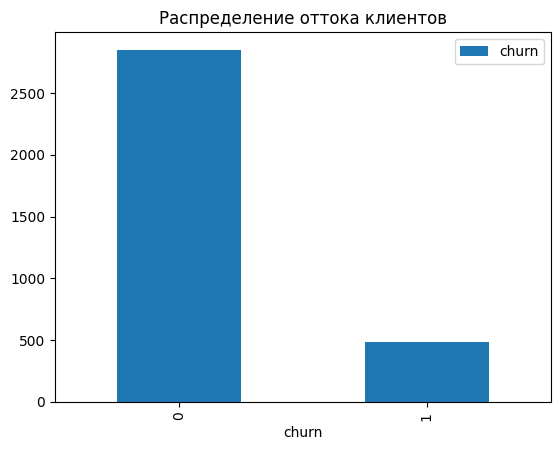

In [37]:
data['churn'].value_counts().plot(kind='bar', label='churn')
plt.legend()
plt.title('Распределение оттока клиентов');

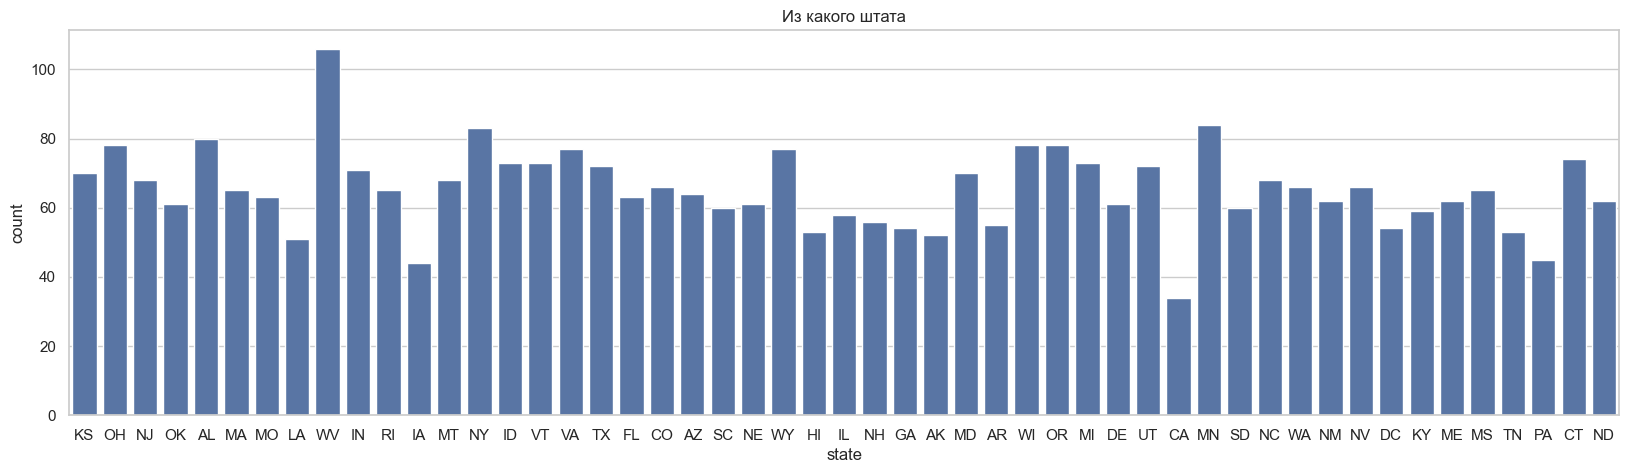

In [50]:
plt.figure(figsize=(20, 5))
sns.countplot(data=data, x="state")
sns.set(style="whitegrid")
plt.title("Из какого штата")
plt.show()

## 1.2.2

Удалите аномальные данные, где необходимо.

## 1.2.3

Определите важные признаки с помощью описательной статистики и корреляции.

In [55]:
corr_matrix = data.drop(['state', 'international plan', 'voice mail plan',
                      'phone number', 'intensive_service_calls_Q'], axis=1).corr()

In [56]:
corr_matrix

account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl cha

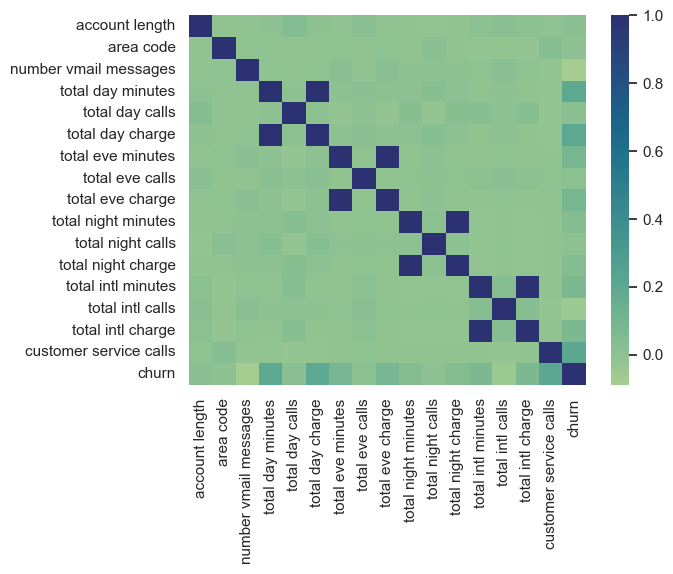

In [61]:
sns.heatmap(corr_matrix, cmap="crest");

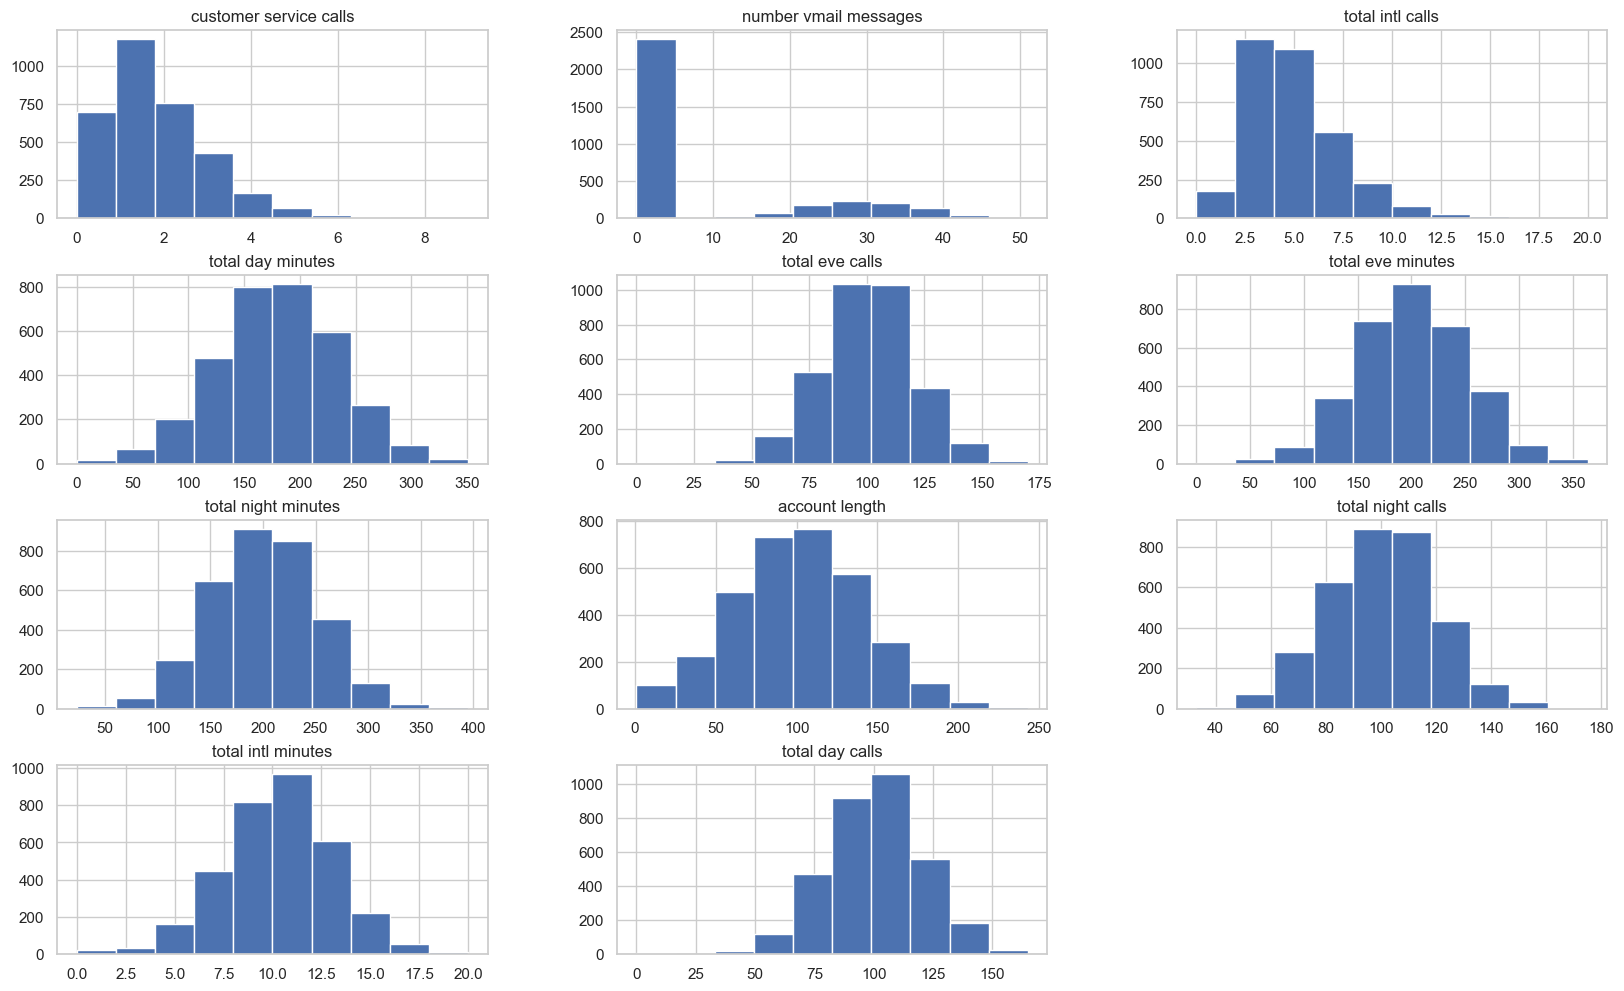

In [63]:
features = list(set(data.columns) - set(['state', 'international plan', 'voice mail plan', 'area code',
                                      'total day charge', 'total eve charge', 'total night charge',
                                        'total intl charge', 'churn','intensive_service_calls_Q', 'phone number']))
data[features].hist(figsize=(20,12));

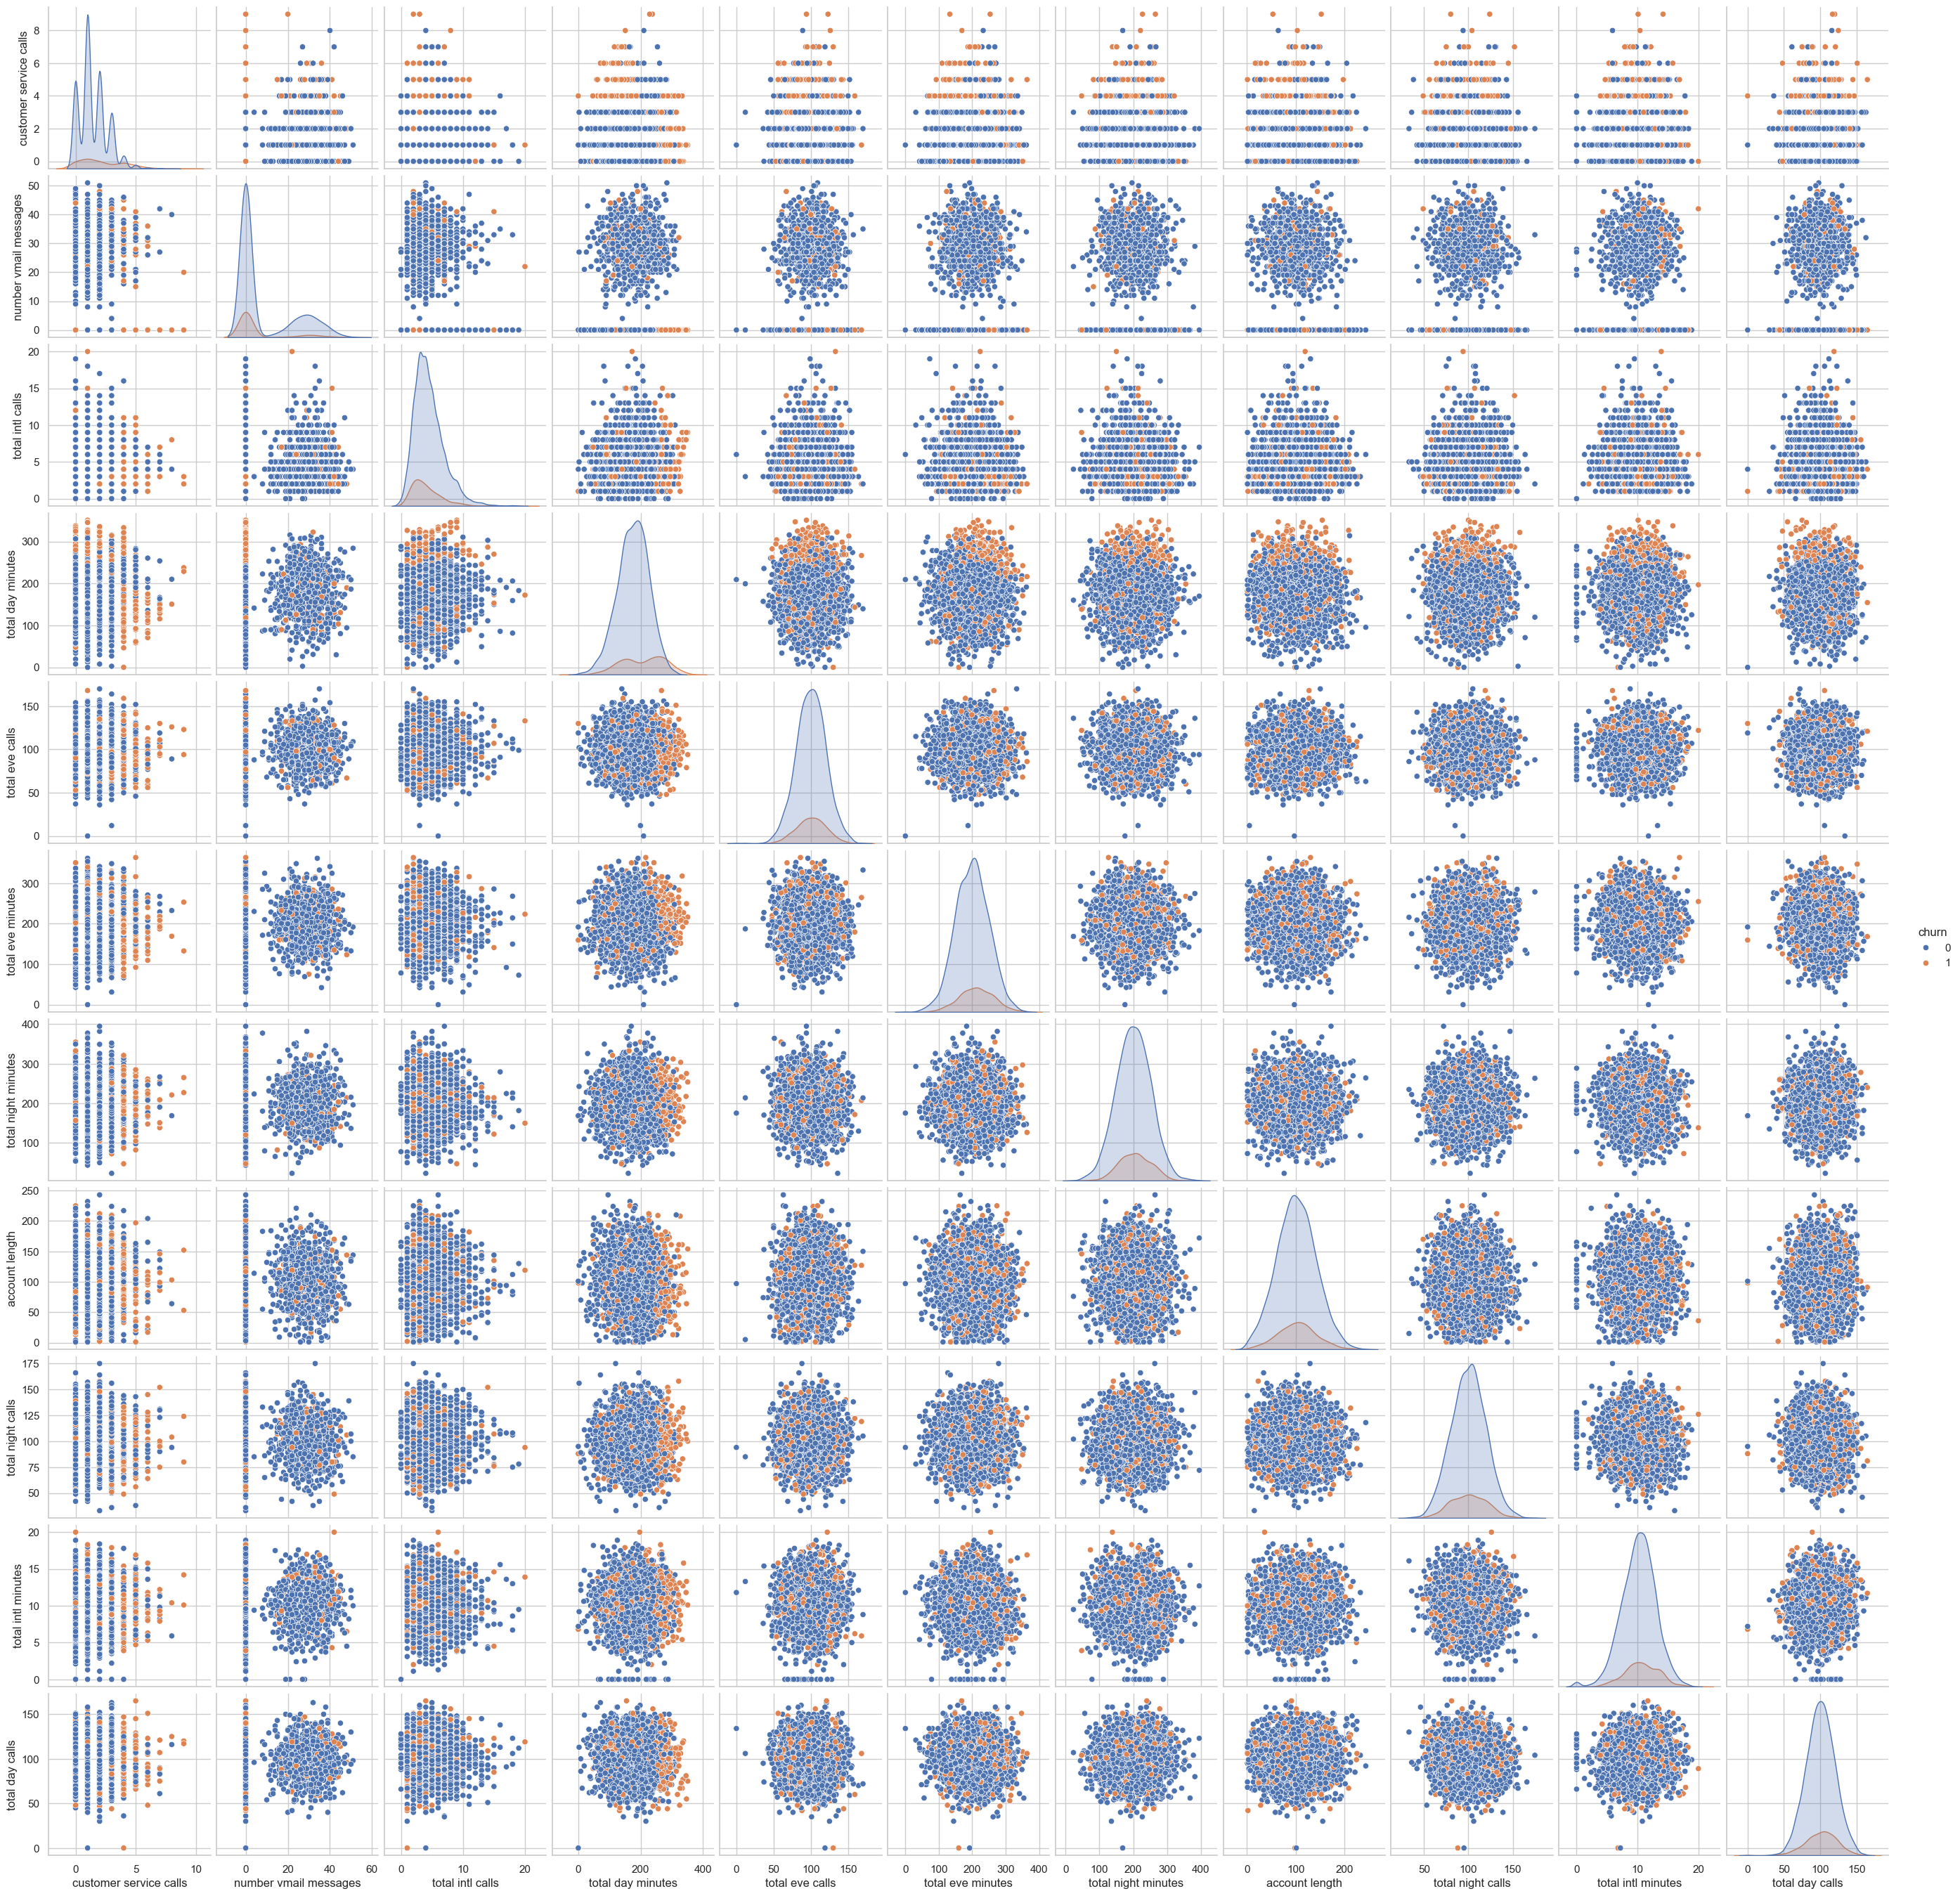

In [65]:
sns.pairplot(data[features + ['churn']], hue='churn');

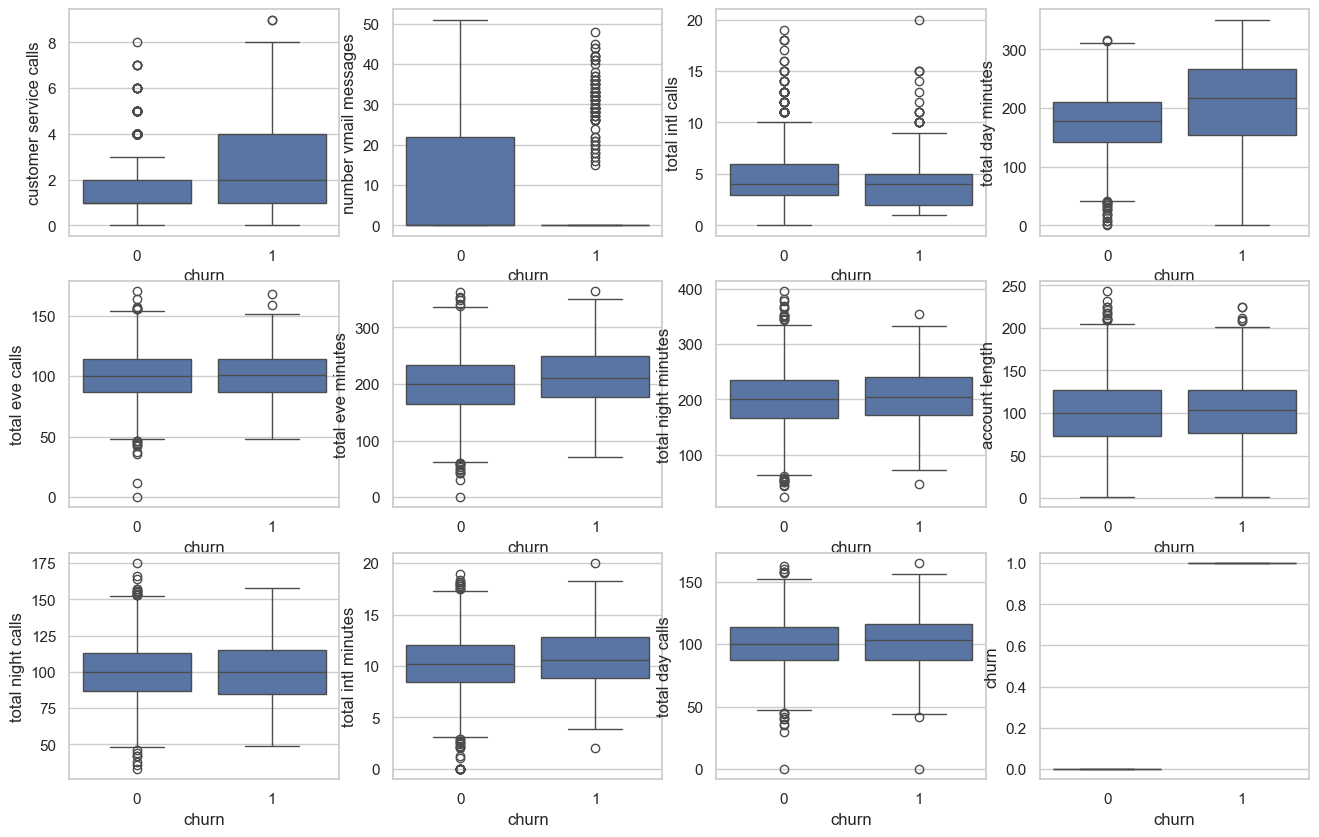

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features + ['churn']): # enumerate - index + element
    sns.boxplot(x='churn', y=feat, data=data, ax=axes[idx // 4, idx % 4])
    # axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('churn')
    axes[idx // 4, idx % 4].set_ylabel(feat);

## 1.2.4

Заполните пропуски и поработайте с данными по своему усмотрению.

## 1.2.5

Подготовленный датасет сохраните в новый csv файл.

# Задание 2

## 2.1

Реализуйте собственные методы для классификации данных методом логистической регрессии. Для минимизации функции потерь используйте градиентный спуск.

In [2]:
def get_value(X):
    sum = 0
    mean = 1 / len(X) * np.sum(X)
    for x in X:
        sum += (x - mean) ** 2
    return sum

In [132]:
def get_weights(X, y, alpha, n):
    w = np.array([np.random.randint(-100, 100, len(X[0]))])
    for _ in range(n):
        temp_mult = np.array([float(np.dot(w, x)) for x in X])
        # temp_mult = [np.dot(w[:, np.newaxis], np.array([x])) for x in X]
        # temp_mult = np.dot(w.T, X.reshape(len(X), len(X[0])))
        # ln = len(temp_mult[0])
        # length = np.full((len(temp_mult), 1), ln)
        # h = np.sqrt(1 / length * get_value(X))
        h = 1 / (1 + np.exp( -1 * temp_mult))
        w = w - alpha * np.dot(X.T, (h - y))
    return w

In [200]:
def get_probabilyty(X, y, alpha, n):
    return 1 / (1 + np.exp( -1 * np.dot(get_weights(X, y, alpha, n), X.T)))

## 2.2

Протестируйте ваш метод на искуственных данных. Сравните с работой встроенной функции.

In [144]:
X_data = np.random.randint(0, 40, (300, 2))
X_data;

In [145]:
rows = np.where(X_data[:, 0] != X_data[:, 1])
rows;

In [146]:
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0] - elem[1]) == 1) for elem in X_data])
y_data;

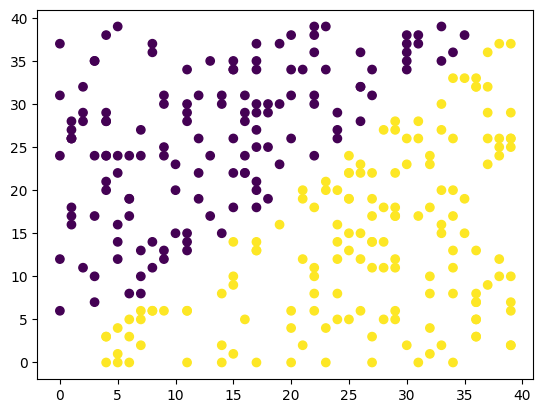

In [147]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = y_data);

In [194]:
inner_model = LogisticRegression(penalty='none')
inner_model.fit(X_data, y_data)

LogisticRegression(penalty='none')

In [149]:
inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)

In [201]:
alpha = 0.01
n = 20
my_prob = get_probabilyty(X_data, y_data, alpha, n)

In [205]:
my_prob;
inner_preds_pr;

In [173]:
(inner_preds == y_data).mean()

1.0

In [196]:
my_w = get_weights(X_data, y_data, alpha, 100)

In [213]:
my_pred = (my_prob > 0.5).astype('int64')
my_pred

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0]], dtype=int6

In [214]:
(my_pred == y_data).mean()

1.0

In [211]:
inner_preds

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0])

In [59]:
print(inner_model.coef_)

[[ 15.28092403 -15.26590012]]


In [209]:
print(my_w)

[[ 39.23835328 -38.81629219]]


### Черновик

In [13]:
np.array([1, 2, 3, 4, 5]) * np.array([32, 16, 8, 4, 2]).reshape(5, 1)

array([[ 32,  64,  96, 128, 160],
       [ 16,  32,  48,  64,  80],
       [  8,  16,  24,  32,  40],
       [  4,   8,  12,  16,  20],
       [  2,   4,   6,   8,  10]])

Логистическая регрессия представляет собой одну из моделей, которые относятся к линейному классификатору. Простыми словами, задачей линейного классификатора является предсказание целевых значений $y$ от переменных (регрессоров) $X$.

В основе модели логистической регрессии лежит предположение о наличии линейной зависимости между признаками $X$ и целевыми значениями $y$.

Задача модели логистической регрессии как раз и состоит в том, чтобы определить параметры $w$, при которых значение функции потерь Logistic Loss будет стремиться к минимальному.

Функция логистического отклика или обратного-логит преобразования.

$\sigma(\vec{w}^T \vec{x_i}) = \frac{1}{1+e^{-\vec{w}^T \vec{x_i}}}$

In [98]:
np.array([32, 16, 8, 4, 2]).reshape(len(np.array([32, 16, 8, 4, 2])), 1)

array([[32],
       [16],
       [ 8],
       [ 4],
       [ 2]])

In [21]:
len((np.array([1, 2, 3, 4, 5]) * np.array([32, 16, 8, 4, 2]).reshape(5, 1))[0])

5

In [42]:
test_a = np.array([1, 2, 3, 4, 5])
test_b = np.array([32, 16, 8, 4, 2]).reshape(5, 1)
temp_mult = test_a * test_b
ln = len(temp_mult[0])
length = np.full((len(temp_mult), 1), ln)

In [26]:
temp_mult

array([[ 32,  64,  96, 128, 160, 192],
       [ 16,  32,  48,  64,  80,  96],
       [  8,  16,  24,  32,  40,  48],
       [  4,   8,  12,  16,  20,  24],
       [  2,   4,   6,   8,  10,  12]])

In [27]:
length

array([[6],
       [6],
       [6],
       [6],
       [6]])

In [18]:
np.random.randint(-100, 100, (10))

array([ -5,  98, -24,  85, -83, -75,  10,  18, -99,  37])

In [121]:
test_c = np.array([[1, 2]])

In [181]:
np.dot(test_c.T, np.array([[1, 1]]))

array([[1, 1],
       [2, 2]])

In [71]:
[np.dot(test_a[:, np.newaxis], np.array([x])) for x in np.array([[1,1],[1,2]])]

[array([[1, 1],
        [2, 2],
        [3, 3],
        [4, 4],
        [5, 5]]),
 array([[ 1,  2],
        [ 2,  4],
        [ 3,  6],
        [ 4,  8],
        [ 5, 10]])]

In [55]:
test_a[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [112]:
np.array([np.random.randint(-100, 100, 2)])

array([[  1, -28]])

In [131]:
np.array([float(np.dot(test_c, x)) for x in X_data])

C:\Users\anshp\AppData\Local\Temp\ipykernel_8408\1946141935.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.array([float(np.dot(test_c, x)) for x in X_data])


array([ 58.,  82.,  66.,  75.,  56.,  65.,  54.,  77.,  52.,  25., 106.,
        63.,  58.,  12.,  45.,  59.,  99.,  97.,   9.,  47.,  41.,  90.,
        11., 104.,  48.,  37.,  15.,  72.,  47.,  65.,  22.,  76.,  25.,
        74.,  15.,  34.,  11.,  98.,  90.,  35.,  57.,  54.,  57.,  81.,
        59.,   7.,  70.,  89.,  44.,  95.,  13.,  43.,  70.,  11., 100.,
        11.,  64.,  46.,  63.,  94.,  72.,  72.,  71.,  88.,  33.,  36.,
        75.,  68.,  73.,  24.,  54.,  30.,  35.,  47.,  41.,  57.,  73.,
       111.,  14.,  41.,  48.,  44.,  10.,  68., 103.,  92.,  23.,  35.,
        37.,  71.,  71.,  71.,  47.,  96.,  77.,  44.,  53.,  67.,  75.,
        30.,  54.,  63.,  63.,  20., 115.,  94.,  56.,  31., 109.,  65.,
        58.,  57.,  57.,  73.,  97.,  92.,  20.,  26.,  56.,  36.,  57.,
        45., 105.,  77.,  13.,  23.,  77.,  39.,  84.,  41.,  50.,  87.,
        95.,  51.,  16.,  92., 108., 102.,  42.,  97.,  64.,  42.,  91.,
        27., 110.,  99.,  37., 109.,  71.,  10.,  4

In [ ]:
np.dot()